In [0]:
!pip install uproot

     |████████████████████████████████| 112kB 8.7MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 


In [0]:
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plotly import graph_objs as go
import pylab
import seaborn as sns

In [0]:
import sys
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls '/content/drive/My Drive/root_files/nts.owner.stage1-dsstops-CRV.g4-10-5.root'

'/content/drive/My Drive/root_files/nts.owner.stage1-dsstops-CRV.g4-10-5.root'


In [0]:
def plot2d(crvdf_colx, crvdf_coly, padx, pady):
    ax[padx,pady].hist2d(crvdf_colx, crvdf_coly, bins=(200, 200), cmap=plt.cm.rainbow, norm=mcolors.LogNorm())
    ax[padx,pady].set_aspect('equal')
    ax[padx,pady].set_xlabel(crvdf_colx.name)
    ax[padx,pady].set_ylabel(crvdf_coly.name)

In [0]:
fileCRVups = uproot.open(main_path+"root_files/nts.owner.stage1-dsstops-DS.g4-10-5.CRV.root")
fileDSups = uproot.open(main_path+"root_files/nts.owner.stage1-dsstops-DS.g4-10-5.DS.root")

fileCRVgap = uproot.open(main_path+"root_files/nts.owner.stage1-dsstops-CRV.g4-10-5.root")
fileDSgap = uproot.open(main_path+"root_files/nts.owner.stage1-dsstops-DS.g4-10-5.root")

crvtreeups = fileCRVups["HitDumper"]["nt"]
dstreeups = fileDSups["HitDumper"]["nt"]
                        
crvtreegap = fileCRVgap["HitDumper"]["nt"]
dstreegap = fileDSgap["HitDumper"]["nt"]

In [0]:
crvdfups = crvtreeups.pandas.df(flatten=False)
dsdfups = dstreeups.pandas.df(flatten=False)

crvdfgap = crvtreegap.pandas.df(flatten=False)
dsdfgap = dstreegap.pandas.df(flatten=False)

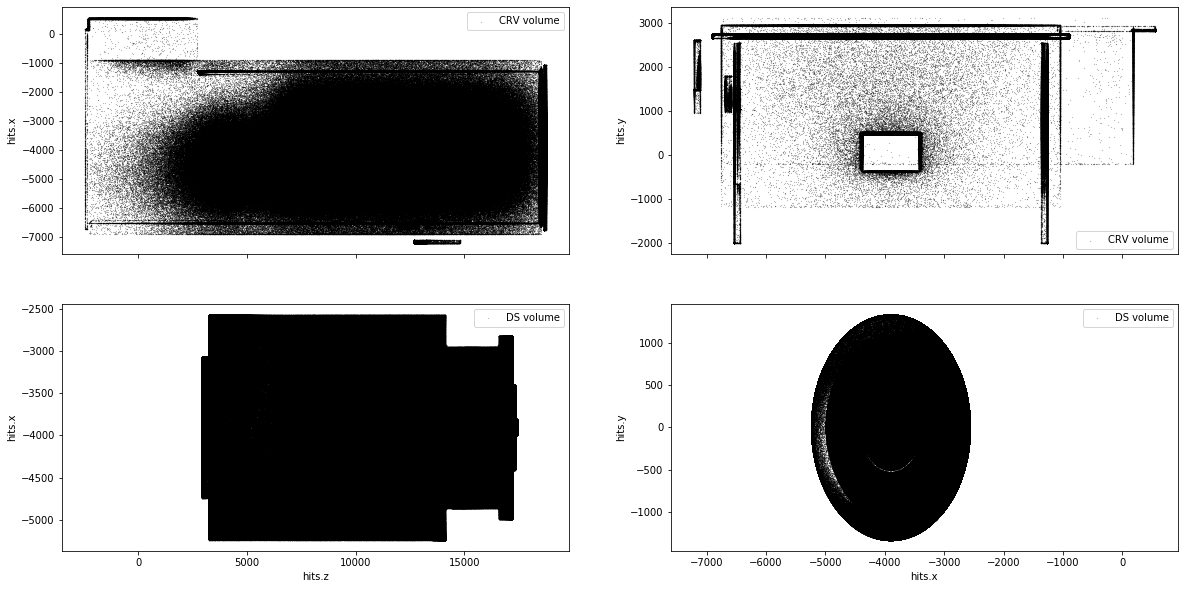

In [0]:
fig, axes = plt.subplots(2, 2, sharex='col',figsize=(20,10))
crvdfgap.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.01, ax=axes[0,0], label='CRV volume')
crvdfgap.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.01, ax=axes[0,1], label='CRV volume')
dsdfgap.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.01, ax=axes[1,0], label='DS volume')
dsdfgap.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.01, ax=axes[1,1], label='DS volume')

# Gap event distributions at the CRV and DS

''

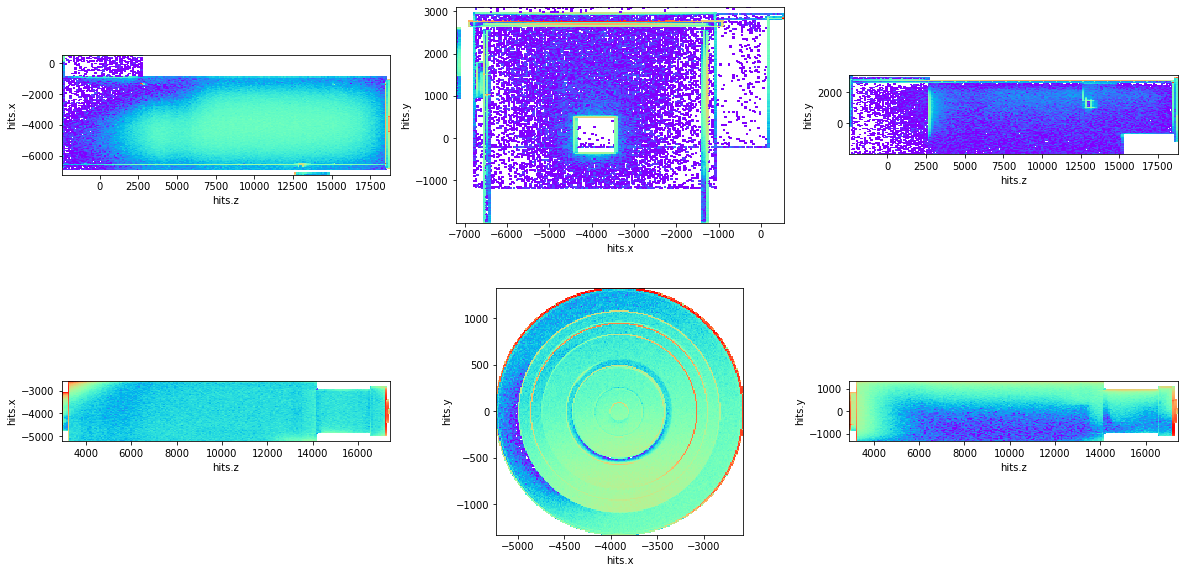

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plot2d(crvdfgap['hits.z'], crvdfgap['hits.x'], 0, 0)
plot2d(crvdfgap['hits.x'], crvdfgap['hits.y'], 0, 1)
plot2d(crvdfgap['hits.z'], crvdfgap['hits.y'], 0, 2)

plot2d(dsdfgap['hits.z'], dsdfgap['hits.x'], 1, 0)
plot2d(dsdfgap['hits.x'], dsdfgap['hits.y'], 1, 1)
plot2d(dsdfgap['hits.z'], dsdfgap['hits.y'], 1, 2)
;

# Upstream event distributions at the CRV and DS

''

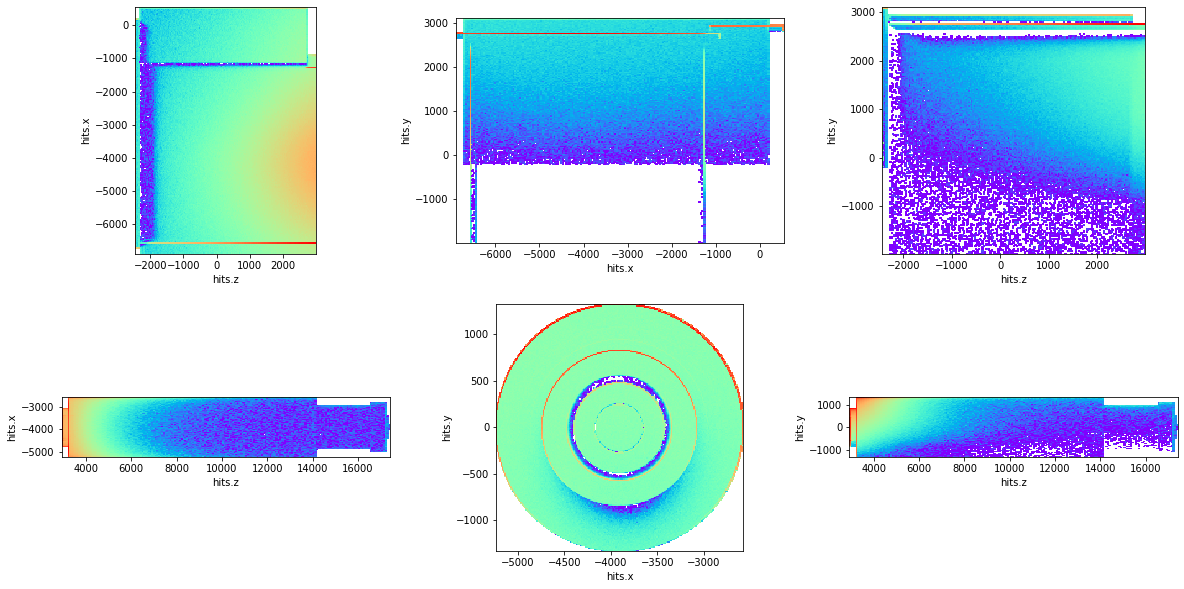

In [0]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
plot2d(crvdfups['hits.z'], crvdfups['hits.x'], 0, 0)
plot2d(crvdfups['hits.x'], crvdfups['hits.y'], 0, 1)
plot2d(crvdfups['hits.z'], crvdfups['hits.y'], 0, 2)

plot2d(dsdfups['hits.z'], dsdfups['hits.x'], 1, 0)
plot2d(dsdfups['hits.x'], dsdfups['hits.y'], 1, 1)
plot2d(dsdfups['hits.z'], dsdfups['hits.y'], 1, 2)
;

# Upstream neutrons distributions at the CRV and DS

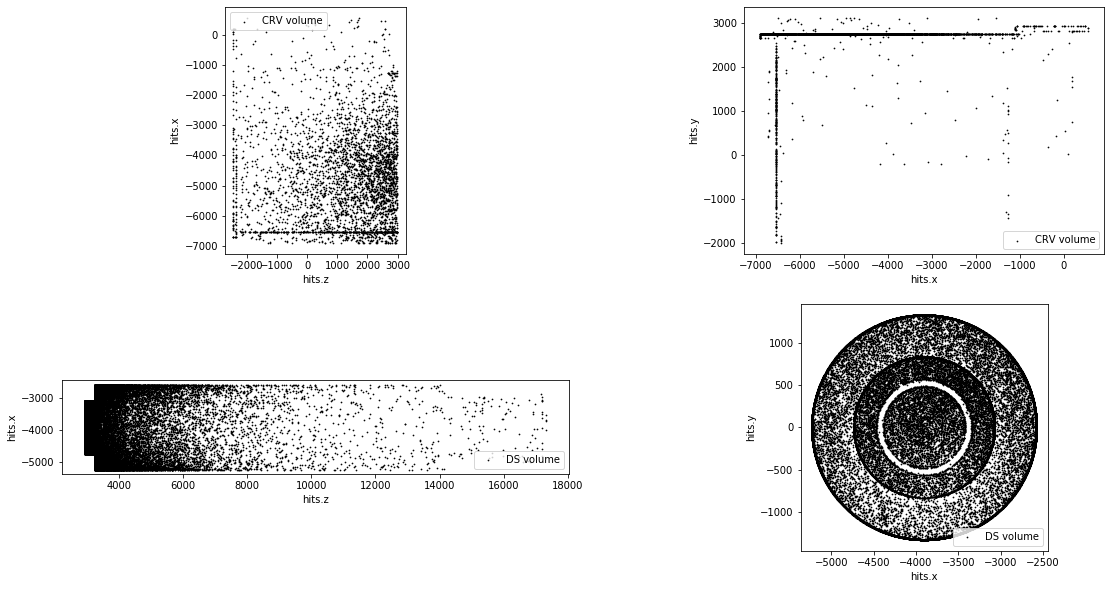

In [0]:
dsdfcut = dsdfups.loc[(dsdfups['hits.pdgId'] == 2112)]
crvdfcut = crvdfups.loc[(crvdfups['hits.pdgId'] == 2112)]

fig, axes = plt.subplots(2, 2,figsize=(20,10))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

crvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.5, ax=axes[0,0], label='CRV volume')
crvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.5, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.5, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.5, ax=axes[1,1], label='DS volume')

# Gap neutrons distributions at the CRV and DS

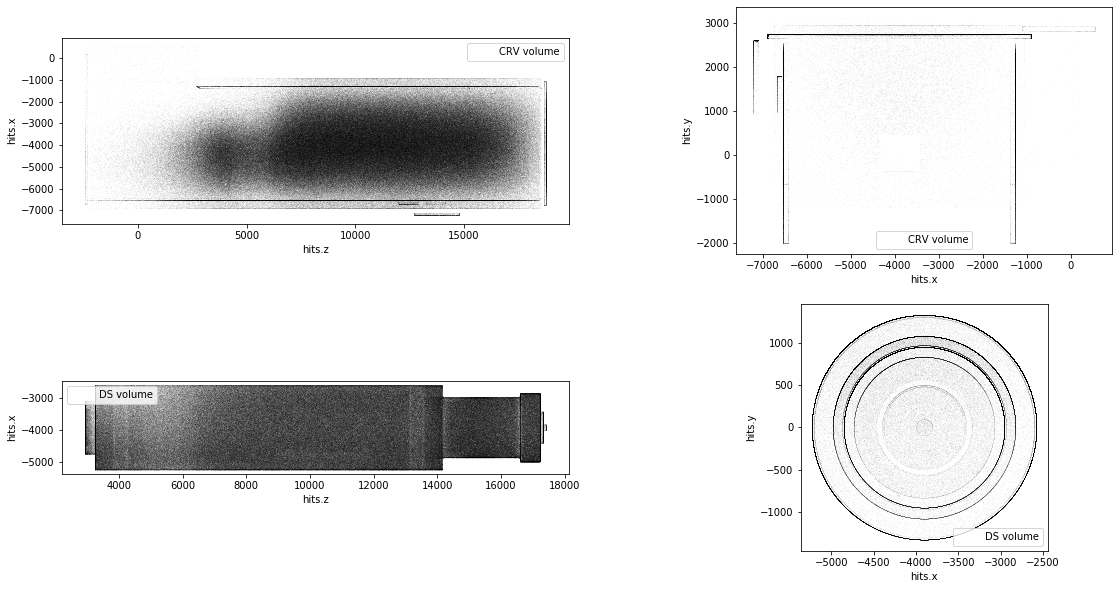

In [0]:
dsdfcut = dsdfgap.loc[(dsdfgap['hits.pdgId'] == 2112)]
crvdfcut = crvdfgap.loc[(crvdfgap['hits.pdgId'] == 2112)]

fig, axes = plt.subplots(2, 2,figsize=(20,10))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

crvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[0,0], label='CRV volume')
crvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter( x='hits.z', y='hits.x', c='Black', s=0.0001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter( x='hits.x', y='hits.y', c='Black', s=0.0001, ax=axes[1,1], label='DS volume')

# Gap muons distributions at the CRV and DS

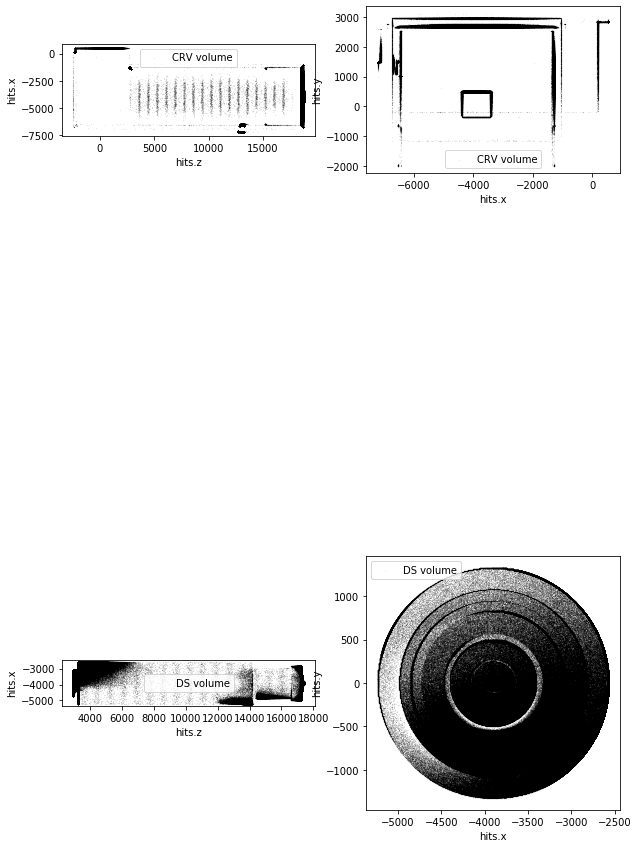

In [0]:
dsdfcut = dsdfgap.loc[(dsdfgap['hits.pdgId'] == 13)]
crvdfcut = crvdfgap.loc[(crvdfgap['hits.pdgId'] == 13)]

fig, axes = plt.subplots(2, 2,figsize=(10,20))
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')

crvdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[0,0], label='CRV volume')
crvdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[0,1], label='CRV volume')
dsdfcut.plot.scatter(x='hits.z', y='hits.x', c='Black', s=0.001, ax=axes[1,0], label='DS volume')
dsdfcut.plot.scatter(x='hits.x', y='hits.y', c='Black', s=0.001, ax=axes[1,1], label='DS volume')


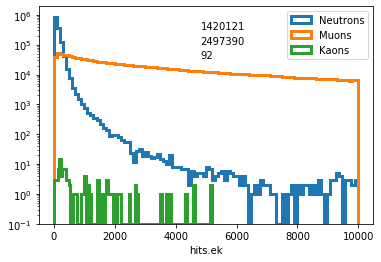

In [0]:
neutr = dsdfgap.loc[(dsdfgap['hits.ek'] < 10000) & (dsdfgap['hits.pdgId'] == 2112)]
muons = dsdfgap.loc[(dsdfgap['hits.ek'] < 10000) & (abs(dsdfgap['hits.pdgId']) == 13)]
kaons = dsdfgap.loc[(dsdfgap['hits.ek'] < 10000) & (dsdfgap['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(dsdfgap.loc[dsdfgap['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(dsdfgap.loc[abs(dsdfgap['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(dsdfgap.loc[dsdfgap['hits.pdgId'] == 130].index))
plt.legend()


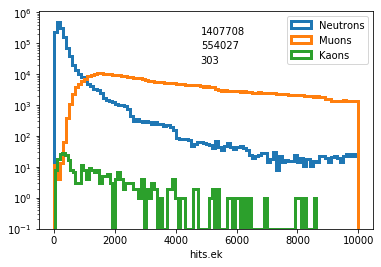

In [0]:
neutr = crvdfgap.loc[(crvdfgap['hits.ek'] < 10000) & (crvdfgap['hits.pdgId'] == 2112)]
muons = crvdfgap.loc[(crvdfgap['hits.ek'] < 10000) & (abs(crvdfgap['hits.pdgId']) == 13)]
kaons = crvdfgap.loc[(crvdfgap['hits.ek'] < 10000) & (crvdfgap['hits.pdgId'] == 130)]
sns.distplot(neutr['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Neutrons")
sns.distplot(muons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Muons")
sns.distplot(kaons['hits.ek'],  kde=False, hist_kws={"histtype": "step", 'log':True, "linewidth": 3, "alpha": 1}, bins=100, label="Kaons")

plt.figtext(0.5,0.80, len(crvdfgap.loc[crvdfgap['hits.pdgId'] == 2112].index))
plt.figtext(0.5,0.75, len(crvdfgap.loc[abs(crvdfgap['hits.pdgId']) == 13].index))
plt.figtext(0.5,0.70, len(crvdfgap.loc[crvdfgap['hits.pdgId'] == 130].index))
plt.legend()

In [0]:
crvdfgap['hits.ek'].loc[crvdfgap['hits.pdgId'] == 2112].describe().loc[['mean','std','count']]


mean     2.874497e+02
std      7.432524e+02
count    1.407708e+06
Name: hits.ek, dtype: float64

In [0]:
crvdfgap['hits.ek'].loc[abs(crvdfgap['hits.pdgId']) == 13].describe()


count    5.540270e+05
mean     1.056395e+04
std      2.561502e+04
min      2.790641e+00
25%      2.265515e+03
50%      4.512393e+03
75%      1.018628e+04
max      3.477538e+06
Name: hits.ek, dtype: float64

In [0]:
crvdfgap['hits.ek'].loc[crvdfgap['hits.pdgId'] == 130].describe().loc[['mean','std','count']]

mean     1820.514648
std      3236.230225
count     303.000000
Name: hits.ek, dtype: float64

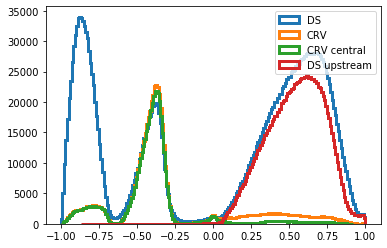

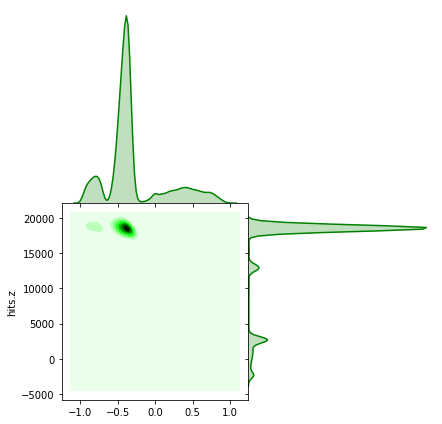

In [0]:
muons_dsv = dsdfgap.loc[(abs(dsdfgap['hits.pdgId']) == 13)]
muons_crv = crvdfgap.loc[(abs(crvdfgap['hits.pdgId']) == 13)]

muons_dsv_upst = dsdfgap.loc[(abs(dsdfgap['hits.pdgId']) == 13) & (dsdfgap['hits.z'] < 4000)]
muons_crv_cent = crvdfgap.loc[(abs(crvdfgap['hits.pdgId']) == 13) & (crvdfgap['hits.z'] > 3000)]

sns.distplot(muons_dsv['hits.pz']/muons_dsv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS")
sns.distplot(muons_crv['hits.pz']/muons_crv['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV")
sns.distplot(muons_crv_cent['hits.pz']/muons_crv_cent['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="CRV central")
sns.distplot(muons_dsv_upst['hits.pz']/muons_dsv_upst['hits.pmag'], kde=False, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1}, bins=200, label="DS upstream")
plt.legend()

angle = muons_crv['hits.pz']/muons_crv['hits.pmag']

#sns.jointplot(x=muons_crv['hits.pz']/muons_crv['hits.pmag'], y="hits.z", data=muons_crv, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6)
sns.jointplot(x=angle, y="hits.z", data=muons_crv, kind="kde", space=0, color="g", ratio=1)